# ALPACA Kernel & Updated ALPACA Firmware
#### `matplotlib`, `numpy`, and live plotting

This notebook outlines two new tools at your disposal for doing the final assignment:
- New Jupyter Notebook Kernel: *The Alpaca Kernel*
- Updated *Alpaca Firmware*

After installing both tools, you'll be able to do the following things:

## Features:

### 1. Plotting data directly from the Alpaca
**Before**, plotting data was done like so:
```python
%use micropython
pico.store_data("general_data.txt", samples=[xx, yy])

%use micropython
%fetchfile --binary "general_data.txt" "data_picopiX.txt"

%use python3
samples=np.loadtxt("data_picopiX.txt")
xx, yy = (samples[0,:], samples[1,:])
plt.plot(xx, yy)
```

**Now**, plotting can be done *directly* from MicroPython **(NEW!)**:
```python
%use micropython
plt.plot(xx,yy)
```
------------------

### 2. Using `numpy` directly from the Alpaca
**Before**, numpy wasn't available for MicroPython. This meant that lists had to be modified using `for` loops (slow and ugly):
```python
%use micropython
my_list = [1, 2, 3]

for ii in range(len(my_list)):
    my_list[ii] = my_list[ii] * 3

print(my_list)
[3, 6, 9]
```

**Now**, `numpy` can be used *directly* from MicroPython **(NEW!)**:
```python
%use micropython
import numpy as np
my_array = np.array(my_list)
my_array * 3

print(my_array)
array([3.0, 6.0, 9.0], dtype=float32)
```
------------------

### 3. Live plotting
 **(NEW!)** Plot data as it comes in rather than after your measurement. This might be useful if you are performing a very long measurement and want to check if everthing is going alright.


<div>
<img src="resource\asnlib\public\msedge_oRfTDroDwi.gif" width="500"/>
</div>

___________

### Installing the kernel
For now, the best way to install the ALPACA kernel is via the Anaconda Prompt:
- Shut down Jupyter Notebook
- `activate nb2211-2021`
- `conda install -c twh alpaca_kernel`
- `python -m alpaca_kernel.install`

> <font size=6>ℹ️</font>
>
> During the installation, the command line will give the following
prompt:
>
> `Proceed ([y]/n)?`
>
> Press `Y` , then press `Enter`.

---------------
### Installing the firmware
The newest version of the ALPACA Firmware can be downloaded from [Brightspace](https://brightspace.tudelft.nl/d2l/le/content/401270/viewContent/2486660/View). The installation instructions are also available [here](https://brightspace.tudelft.nl/d2l/le/content/401270/viewContent/2486663/View).

- Unplug all the cables going to the ALPACA
- Download `Alpaca_firmware.uf2` from Brightspace.
- Push and hold the BOOTSEL button and plug your ALPACA into the USB port of your PC. Release the BOOTSEL button only after your Alpaca is connected.
- It will mount as a Mass Storage Device called RPI-RP2.
- Drag and drop the Alpaca firmware.uf2 file onto the RPI-RP2 volume. Your ALPACA will reboot. 

> <font size=6>ℹ️</font>
>
> Make sure both USB cables are disconnected prior to re-connecting the ALPACA

## Feature 0: MicroPython Bypass

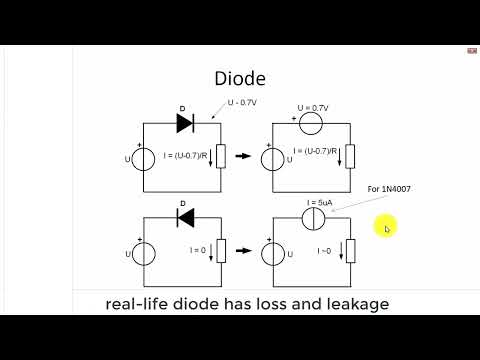

In [1]:
%python
from IPython.lib.display import YouTubeVideo
YouTubeVideo('4O4Qf2TgXwU', width = 600, height = 450)

In [1]:
%python
from ipywidgets import FileUpload
from IPython.display import Image
import os

upload=FileUpload(accept='image/', multiple=False )
upload

UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).


In [3]:
%python
file_name="test_card.png"
if upload.value:
    with open(file_name,"wb") as f:
        f.write(upload.value[-1]["content"])  # python 3.8 Kernel code, change kernel in Vocareum!
Image(filename=file_name, width="50%")

NameError: name 'upload' is not defined

In [4]:
print("Test")

No serial connected
  %serialconnect to connect
  %esptool to flash the device
  %lsmagic to list commands

## Feature 1: `numpy` built-in

In [5]:
%serialconnect --port="COM5"

Connecting to --port=COM5 --baud=115200 
Ready.


This makes managing arrays much nicer than bare Micropython:

In [5]:
import numpy as np

xx = np.linspace(0, 10, 50)
f1 = np.sin(xx)
f2 = np.log(xx)

f1_larger = xx[f1 > f2]
print(f'f1 is larger than f2 from approx. x = {np.min(f1_larger)} to x = {np.max(f1_larger)}')


f1 is larger than f2 from approx. x = 0.0 to x = 2.040816


In [5]:
m = np.array([[1, 2, 3], [4, 5, 6], [7, 10, 9]], dtype=np.uint8)
n = np.linalg.inv(m)
print("m:\n", m)
print("\nm^-1:\n", n)
# this should be the unit matrix
print("\nm*m^-1:\n", np.dot(m, n))

m:
 array([[1, 2, 3],
       [4, 5, 6],
       [7, 10, 9]], dtype=uint8)

m^-1:
 array([[-1.25, 1.0, -0.25],
       [0.5, -1.0, 0.5],
       [0.4166666, 0.3333333, -0.25]], dtype=float32)

m*m^-1:
 array([[1.0, 0.0, 0.0],
       [-4.768372e-07, 1.0, 0.0],
       [-9.536743e-07, 0.0, 1.0]], dtype=float32)


## Feature 2: `matplotlib` emulation
The more popular functions from `matplotlib` are now availabe right on the ALPACA thanks to the new kernel. For now, only `pyplot` functions are supported, e.g. all the methods starting with `plt`. Saving files and transfering them to the PC is no longer needed. Faster feedback hopefully makes for a better user experience.

Notes:
- `plt` functions only work in a single cell and thus cannot span multiple cells.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(-5, 5, 50)
f1 = np.sin(xx)
f2 = np.log(xx)

print("Printing something useful...")
plt.plot(xx, f1, label='$f_1 = sin(x)$')
plt.plot(xx, f2, label='$f_2 = log(x)$')

print("Printing more useful stuff...")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Two functions plotted")
plt.grid()
plt.legend()

## Feature 3: Live plotting
Most importantly for the final assignment, live plotting is now supported. Enabling live plotting can be done by adding the magic command `%plot --mode live` to the top of the code. This works similarly to Arduino: when enabled, the serial output is monitored for a specifically formatted string:

> `LABEL0 number0 LABEL1 number1 ...`

For example:
> `analog0 0.197 analog1 0.109`

The example was printed using the function:
```python
print('analog0',value0,'analog1',value1)
```

Incoming data is automatticaly stored and appended to older data. The x-axis of the plot is automatticaly labled with the time elapsed from the start of the code to the arrival of the data in the serial output.

Notes:
- Due to differences in caching, the live plot flickers when Jupyter Notebook is run in the Firefox browser. In this case, it is best to use the Edge browser instead.

### Plotting one variable:

In [ ]:
%serialconnect --port="COM5"

In [ ]:
%plot --mode live
from machine import ADC, Pin
import time
import matplotlib.pyplot as plt
from functiongenerator import FuncGen, Sine, Triangle, DC

adc = ADC(Pin(26))


############### NEW METHOD ##################
with FuncGen(Sine(Vpp=2, offset=0, freq=1)):
    for _ in range(250):
        value = adc.read_u16()*5.0354e-05
        plt.liveplot(value)
  


> <font size=6>ℹ️</font>
>
> It might be wise to also *save* the data for later analysis:
> ```python
> with open('backup.txt', 'w+') as f:
>    # Do measurement
>    data_point = ...
>    f.writelines(str(data_point))
> ```

